<h1>2022.05.05. HW</h1>

In [156]:
import warnings

warnings.filterwarnings('ignore')

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [158]:
diabetes = pd.read_csv("C:/ai_dataset/diabetes.csv")

In [159]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h2>1. 데이터 셋을 이용하여 딥러닝으로 분류 수행</h2>

In [160]:
y = diabetes['Outcome']

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [161]:
X = diabetes.iloc[:,0:8].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [162]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [163]:
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [164]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(64,input_shape=(8,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 64)                576       
                                                                 
 dropout_84 (Dropout)        (None, 64)                0         
                                                                 
 dense_117 (Dense)           (None, 32)                2080      
                                                                 
 dropout_85 (Dropout)        (None, 32)                0         
                                                                 
 dense_118 (Dense)           (None, 16)                528       
                                                                 
 dropout_86 (Dropout)        (None, 16)                0         
                                                                 
 dense_119 (Dense)           (None, 2)               

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_history=model.fit(x = X_train, y = y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 0.7774 - accuracy: 0.5879 - val_loss: 0.6503 - val_accuracy: 0.6883
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.6107 - val_loss: 0.6281 - val_accuracy: 0.6883
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.6075 - val_loss: 0.6135 - val_accuracy: 0.6883
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6091 - val_loss: 0.6002 - val_accuracy: 0.7013
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6466 - val_loss: 0.5810 - val_accuracy: 0.7013
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.6433 - val_loss: 0.5665 - val_accuracy: 0.7273
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.6564 - val_loss: 0.5507 - val_accuracy: 0.7403
Epoch 8/100
2

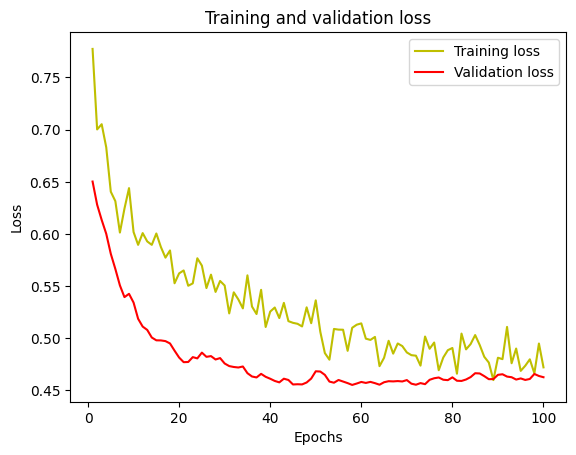

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

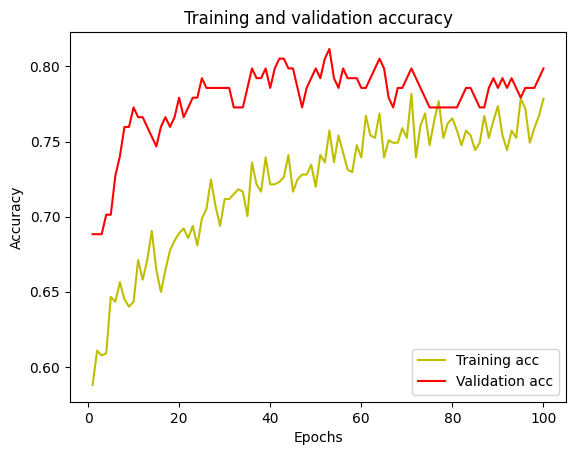

In [167]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h2>2. Outcome을 제거 후, Y 값을 BMI으로 분리, 딥러닝으로 다중 회귀 수행</h2>

In [168]:
diabetes.drop(columns=['Outcome'], inplace=True)

In [169]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [170]:
y = diabetes['BMI']

y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [171]:
X = diabetes.drop('BMI',axis=1)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [173]:
import numpy as np

mean = np.mean(X_train, axis = 0)

std = np.std(X_train, axis = 0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [174]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [175]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(7,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'relu')) 
model.add(Dropout(0.5))
model.add(Dense(1)) 

model.compile(optimizer='rmsprop', loss='mse', metrics = ['mse'])

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 128)               1024      
                                                                 
 dropout_87 (Dropout)        (None, 128)               0         
                                                                 
 dense_121 (Dense)           (None, 64)                8256      
                                                                 
 dropout_88 (Dropout)        (None, 64)                0         
                                                                 
 dense_122 (Dense)           (None, 32)                2080      
                                                                 
 dropout_89 (Dropout)        (None, 32)                0         
                                                                 
 dense_123 (Dense)           (None, 2)               

In [176]:
N_EPOCHS = 500
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/500
18/18 [==============================] - 0s 7ms/step - loss: 1075.9739 - mse: 1075.9739 - val_loss: 1079.6245 - val_mse: 1079.6245
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 1043.6780 - mse: 1043.6780 - val_loss: 1035.1742 - val_mse: 1035.1742
Epoch 3/500
18/18 [==============================] - 0s 2ms/step - loss: 986.5605 - mse: 986.5605 - val_loss: 936.0023 - val_mse: 936.0023
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 861.4181 - mse: 861.4181 - val_loss: 754.1030 - val_mse: 754.1030
Epoch 5/500
18/18 [==============================] - 0s 2ms/step - loss: 662.0312 - mse: 662.0312 - val_loss: 518.9620 - val_mse: 518.9620
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 651.7994 - mse: 651.7994 - val_loss: 413.1827 - val_mse: 413.1827
Epoch 7/500
18/18 [==============================] - 0s 3ms/step - loss: 630.0119 - mse: 630.0119 - val_loss: 390.0414 - val_mse: 390.0414
Epoch 8/500
18/18 [

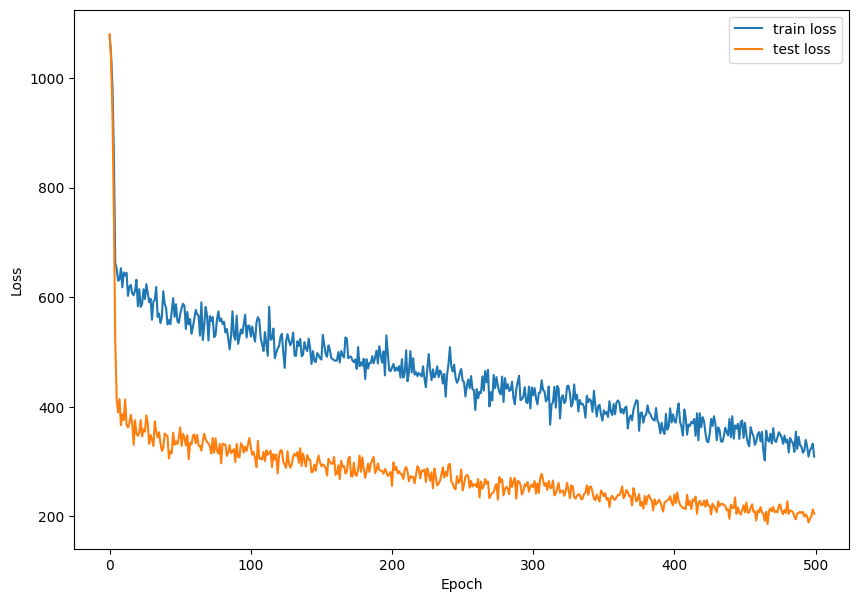

In [177]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

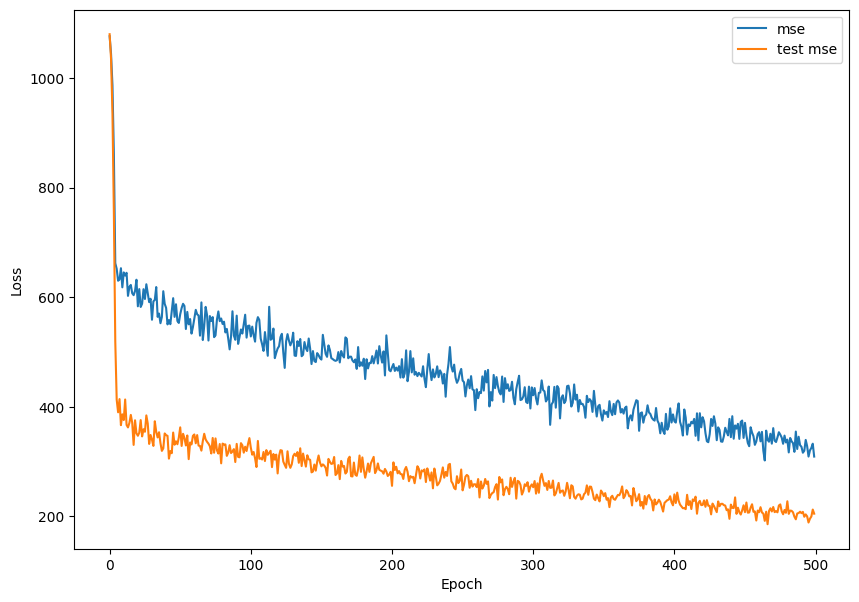

In [178]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()